# Week 1

## Overview
As explained in during the in-class lecture, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## AI and this class

This class is *AI first*. This means that you're allowed to use LLMs to help in answering the questions. 

In fact, you could use a good model to do most (if not all) of the work for you. As I will discuss in detail during the lecture **you shouldn't always do that**. Part of the point of being here is learning how to do certain things using your human brain. To make you better at thinking. If you use the AI for everything you will get worse at thinking. 

And don't forget that the whole point of going to University in the first place is to get better at thinking. So if you just use the AI you're defeating the purpose of spending time at DTU. You'll be wasting your life.

On the other hand, there are many things that it's not important to do on your own. And how the h#ll do you tell what's what? How do you know when to use LLMs and when not to?

<div class="alert alert-block alert-info">
To be of assistance, I've designed a system of blue boxes that I use to clarify this issue. I basically tell you when LLMs are OK and when they don't! Awesome, right?
</div>

## Today

This first lecture covers:

1. **A case study in algorithmic accountability**: We'll explore predictive policing—what it promised, what went wrong, and what we can learn from it.
2. **Hands-on data analysis**: We'll go and grab real San Francisco crime data and start exploring it.

If you want to prepare, you might enjoy watching *Minority Report* (2002)—it's a surprisingly relevant film for this class.

---

# Part 1: Predictive Policing—A Cautionary Tale

For years, "predictive policing" was pitched as the future of law enforcement. The idea was simple: use data and algorithms to predict where crimes would occur, then deploy police resources accordingly. It connected to popular culture through shows like [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) and films like [Minority Report](https://www.imdb.com/title/tt0181689/). Companies like PredPol and Palantir built businesses selling these tools to police departments.

But the story didn't end the way proponents hoped.

**By the early 2020s, many cities abandoned these systems:**
- The **LAPD dropped PredPol in 2020** after audits showed it failed to reduce crime and disproportionately targeted Black and Latino neighborhoods
- **Santa Cruz became the first U.S. city to ban predictive policing** entirely
- Academic research revealed that these systems often **amplified existing biases** rather than providing objective predictions

This makes predictive policing a perfect case study for our class. It shows how data analysis and visualization can be powerful—but also how they can go wrong when we don't think carefully about bias, feedback loops, and the human consequences of algorithmic decisions.

Here's a video introduction to the topic:

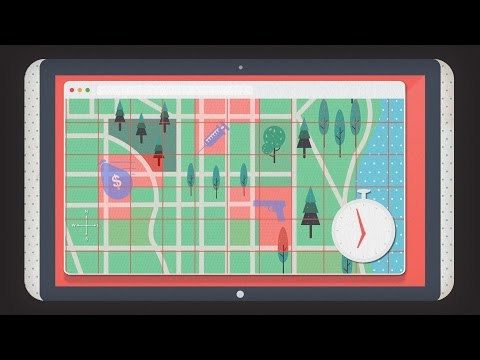

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('YxvyeaL7NEM', width=800, height=450)

([Direct YouTube link](https://www.youtube.com/watch?v=YxvyeaL7NEM) if the embed doesn't work)

### Readings

Please read the following two pieces:

1. **[Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)** (ProPublica, 2016) — A landmark investigation into algorithmic bias in criminal risk assessment. While focused on sentencing rather than patrol allocation, it illustrates the core problems with using historical crime data to make predictions.

2. **[Dirty Data, Bad Predictions: How Civil Rights Violations Impact Police Data](https://www.nyulawreview.org/issues/volume-94-number-1/dirty-data-bad-predictions-how-civil-rights-violations-impact-police-data-predictive-policing-systems-and-justice/)** (Richardson et al., 2019) — This paper argues that police data itself is corrupted by historical discrimination, making any predictions based on retrospective fundamentally flawed. You can skim the legal details but pay attention to the core argument (it's even OK to get an LLM to summarize the data-science relevant parts for you).

> **Exercise 1.1**: After taking a look at the papers, answer the following in your own words:
>
> * The ProPublica article examines COMPAS, a risk assessment algorithm. What did they find about its accuracy for Black defendants vs. white defendants?
>   * ProPublica found out that for the tool COMPAS: "blacks offenders are almost twice as likely as whites to be labeled a higher risk but not actually re-offend. It makes the opposite mistake among whites: They are much more likely than blacks to be labeled lower risk but go on to commit other crimes.".
> * Richardson et al. argue that the *data itself* is problematic. Explain the concept of "dirty data" in your own words. Why can't we just "fix the algorithm" if the training data is biased? Do you agree with this argument?
>   * The authors expand the standard data science definition of "dirty data" (usually meaning missing or non-standard data) to include data produced through corrupt, biased, or unlawful policing practices (tainted ground truth, data manipulation and discuss input validity).
> * Given what you've read, why do you think cities like Los Angeles and Santa Cruz decided to abandon predictive policing?
>   * I think this is the right decision since these tool have been tested to be highly biased; and any person that has been convicted to a greater punishment, whether it is prison or fines, should be compensated accordingly.   

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You can use an LLM to answer these questions. But don't do it!!! The goal is to engage with the readings and form your own understanding. You can use an LLM afterward to refine your writing, but the thinking should be yours.
</div>

---

# Part 2: Getting the Data

Now let's get our hands on some real crime data. We'll be working with San Francisco Police Department incident data, which is publicly available through [SF OpenData](https://data.sfgov.org).

We'll use data from **2018 to the present**. This dataset is cleaner and more consistently formatted than older data, and it covers an interesting period that includes the COVID-19 pandemic.

### Before You Code: Explore the Data

Before writing any code, spend a few minutes looking at the raw data:

> **Exercise 2.1**: Data exploration (no coding yet)
>
> * Go to https://data.sfgov.org and click on "Public Safety"
> * Find the dataset "Police Department Incident Reports: 2018 to Present"
> * Still on the website, scroll down the page and answer:
>   - What columns are available?
>       - Columns about the place, time, identifier and resolution of the incident.
>   - What does each row represent?
>       - Each row is an incident report.
>   - What time range does the data cover?
>       - From September 5, 2018 to February 4, 2026.
>   - What questions come to mind that this data might help answer?
>       - How the datapoint are spread out over the area and if there are specific areas that correlate more with a specific type of incident.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Do this exploration yourself. Getting familiar with raw data before coding is crucial. It's one of the most important parts of data science!
</div>

### Loading the Data

Now let's work with the data in Python. Load it into a Jupyter Notebook. Remember to use `pandas`, it is the standard tool for tabular data in Python. If you need a refresher, see the PythonBootcamp notebook

> **Exercise 2.2**: Load and clean the data
>
> * Download the "Police Department Incident Reports: 2018 to Present" dataset as a CSV
> * Load it into a pandas DataFrame
> * Keep only complete years (i.e., drop partial years at the start/end if the data doesn't begin on Jan 1 or end on Dec 31 of last year). (This is the first part that isn't super easy, so be patient). 
> * You'll want to keep at least: incident category, date/time, and location (both coordinates and police district)
> * Report:
>   - The total number of incidents in your cleaned dataset
>   - The date range covered
>   - The number of incident categories

If any of the above seems difficult, go back to the PythonBootcamp file and make sure your coding skillz are up to par.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You're welcome to use an LLM for help with pandas syntax, data cleaning, and debugging. This is exactly the kind of task where LLMs excel.
</div>

In [31]:
import os
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
cwd = os.getcwd()
csv_path = os.path.join(cwd, '..', 'files', 'Police_Department_Incident_Reports__2018_to_Present_20260205.csv')
df = pd.read_csv(csv_path)

if 'Incident Datetime' not in df.columns or not pd.api.types.is_datetime64_any_dtype(df.get('Incident Datetime')):
    if 'Incident Date' in df.columns and 'Incident Time' in df.columns:
        df['Incident Datetime'] = pd.to_datetime(df['Incident Date'].astype(str) + ' ' + df['Incident Time'].astype(str), errors='coerce')
    else:
        df['Incident Datetime'] = pd.to_datetime(df.get('Incident Datetime'), errors='coerce')
else:
    df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'], errors='coerce')

keep_cols = ['Incident Category', 'Incident Datetime', 'Latitude', 'Longitude', 'Police District']
keep = [c for c in keep_cols if c in df.columns]
df_cleaned = df[keep].copy()
del df 

df_cleaned = df_cleaned.dropna(subset=['Incident Category', 'Incident Datetime', 'Latitude', 'Longitude'])

# determine complete years: drop partial first/last years if dataset doesn't start on Jan 1 / end on Dec 31
min_dt = df_cleaned['Incident Datetime'].min()
max_dt = df_cleaned['Incident Datetime'].max()
start_year = min_dt.year
if min_dt.date() != date(start_year, 1, 1):
    start_year += 1
end_year = max_dt.year
if max_dt.date() != date(end_year, 12, 31):
    end_year -= 1

df = df_cleaned[(df_cleaned['Incident Datetime'].dt.year >= start_year) & (df_cleaned['Incident Datetime'].dt.year <= end_year)].copy()
del df_cleaned

total_incidents = len(df)
date_range = (df['Incident Datetime'].min(), df['Incident Datetime'].max())
n_categories = df['Incident Category'].nunique()
print("Total incidents (cleaned):", total_incidents)
print("Date range (cleaned):", date_range[0], "to", date_range[1])
print("Number of incident categories (cleaned):", n_categories)

# df.head()

Total incidents (cleaned): 940887
Date range (cleaned): 2018-01-01 00:00:00 to 2025-12-31 23:57:00
Number of incident categories (cleaned): 49


---

# Part 3: Exploring Crime Categories

With the data loaded, let's start exploring. A natural first question: **what kinds of crimes occur in San Francisco?**

> **Exercise 3.1**: Crime categories
>
> * List all unique incident categories in the dataset
> * Count the number of incidents in each category
> * What is the most common category? The least common?

> **Exercise 3.2**: Visualize crime categories
>
> Create a bar chart showing the number of incidents by category.
>
> **Visualization tips:**
> * With many categories, a **horizontal bar chart** is often easier to read (category names fit better)
> * Sort bars by frequency (most common at top or bottom)
> * **Always label your axes** — a plot without labels is just a pretty shape (and makes me insane)
> * Consider whether you need to show *all* categories or just the top N (it's OK to make a choice here). You could also show categories with more than 1000 examples, etc.
> * What would happen if you used log-counts/or logarithmic axes?
> * Consider removing the uninformative categories, such as `Other Miscellaneous`, `Other Offenses`, etc.
> * Add a title that tells the reader what they're looking at

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Feel free to use an LLM for creating the visualization. But make sure you understand the code—you'll be making many more plots in this course.
</div>

Number of unique categories: 49
Most common category: Larceny Theft ( 266257 incidents )
Least common category count: 3
Least common categories (may be ties): ['Human Trafficking (B), Involuntary Servitude']


Incident Category
Larceny Theft                               266257
Other Miscellaneous                          68740
Malicious Mischief                           65644
Assault                                      64382
Burglary                                     55334
Motor Vehicle Theft                          54110
Non-Criminal                                 36892
Fraud                                        32726
Warrant                                      32449
Drug Offense                                 30312
Recovered Vehicle                            28103
Lost Property                                24510
Missing Person                               22463
Robbery                                      22325
Suspicious Occ                               21241
Disorderly Conduct                           18523
Offences Against The Family And Children     13550
Miscellaneous Investigation                  12770
Traffic Violation Arrest                      9173
Other        

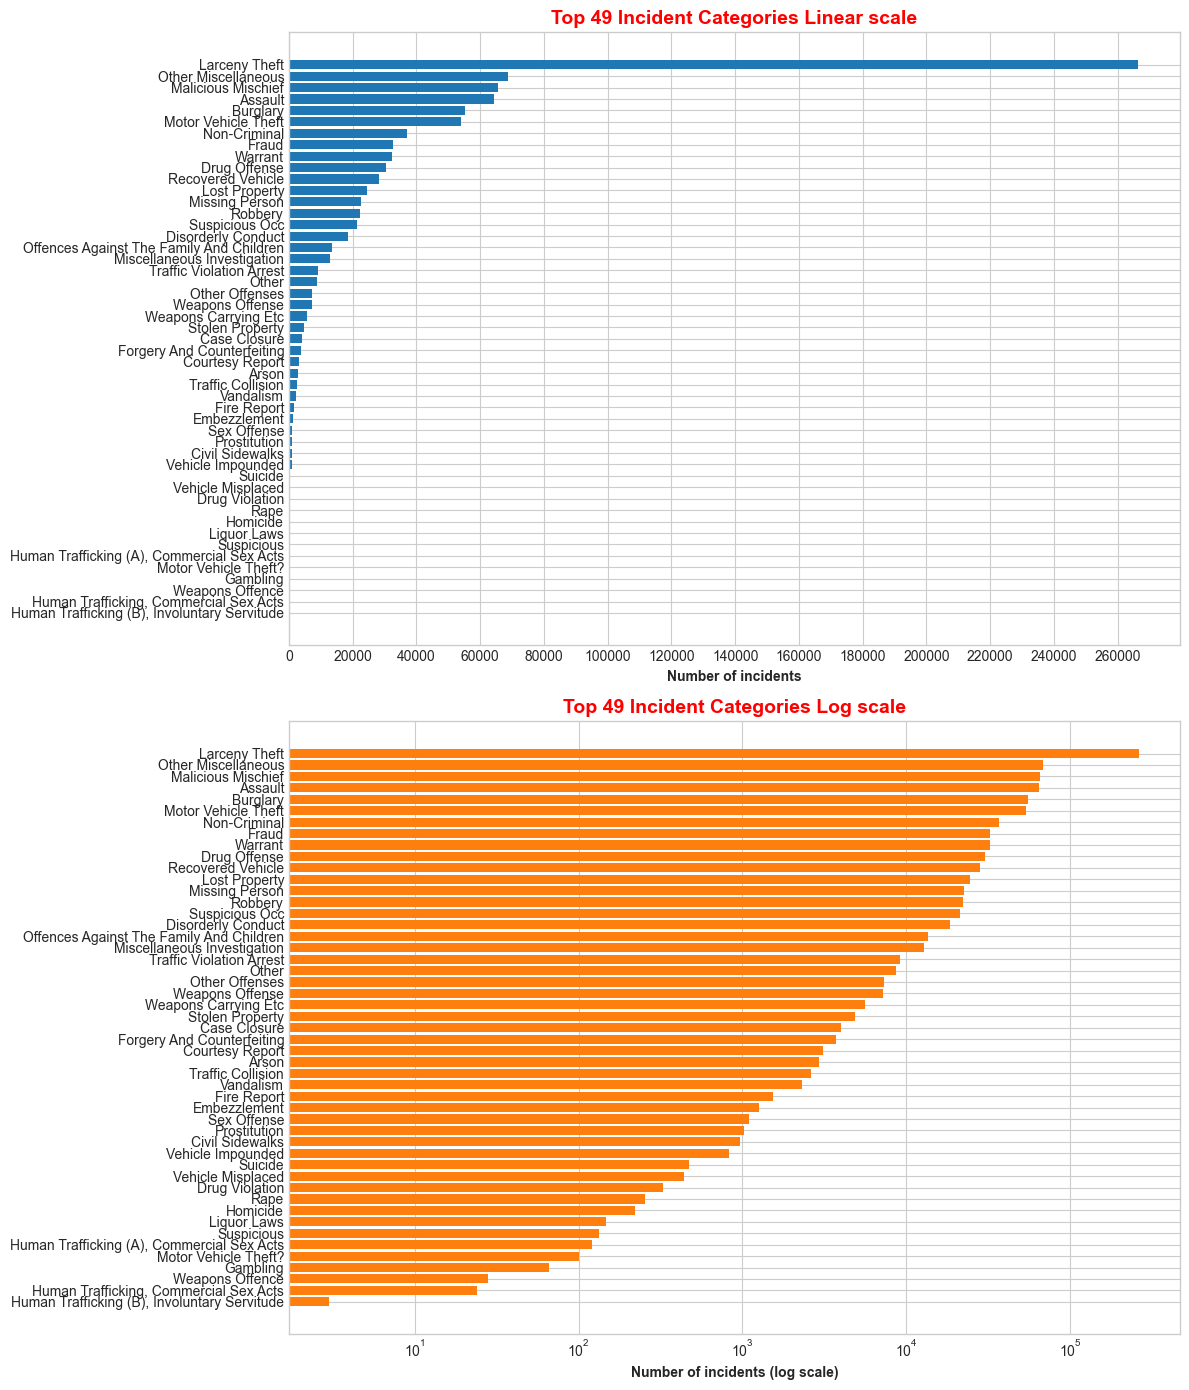

In [28]:
# counts and uniques
cats = df['Incident Category']
n_categories = cats.value_counts()
unique_categories = n_categories.index.tolist()
most_common = n_categories.idxmax()
least_count = n_categories.min()
least_common = n_categories[n_categories == least_count].index.tolist()

print("Number of unique categories:", len(unique_categories))
print("Most common category:", most_common, "(", n_categories[most_common], "incidents )")
print("Least common category count:", least_count)
print("Least common categories (may be ties):", least_common)
display(n_categories.head(20))

top_n = 49
top_counts = n_categories.head(top_n).sort_values(ascending=True)  # ascending so largest appears at top in horizontal plot

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# linear scale
axes[0].barh(top_counts.index, top_counts.values, color='C0')
axes[0].set_xlabel('Number of incidents', fontweight='bold')
axes[0].set_title(f'Top {top_n} Incident Categories Linear scale', fontweight='bold', color='red', fontsize=14)
axes[0].set_xticks(range(0, top_counts.values.max() + 1000, 20000))

# log scale
axes[1].barh(top_counts.index, top_counts.values, color='C1')
axes[1].set_xscale('log')
axes[1].set_xlabel('Number of incidents (log scale)', fontweight='bold')
axes[1].set_title(f'Top {top_n} Incident Categories Log scale', fontweight='bold', color='red', fontsize=14)

plt.tight_layout()
plt.show()

---

# Part 4: Temporal Patterns

Static counts are useful, but crime isn't static—it changes over time. Let's investigate temporal patterns.

> **Exercise 4.1**: Yearly crime counts
>
> * Count the total number of incidents per year
> * Which year had the most incidents? The fewest?
> * Create a bar chart showing incidents by year
> * What do you notice? Any years that stand out? (Think about what was happening in the world...)
>   * There is a clear reduction in crimes in 2020 and 2021 as the world was slowed down by the COVID global pandemic.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Use an LLM freely for the data manipulation and plotting. Use your own brain for interpreting what you see.
</div>

Incidents per year:
year
2018    139575
2019    134698
2020    108958
2021    118577
2022    124665
2023    122607
2024    102793
2025     89014
Year with most incidents: 2018 (139575 incidents)
Year with fewest incidents: 2025 (89014 incidents)


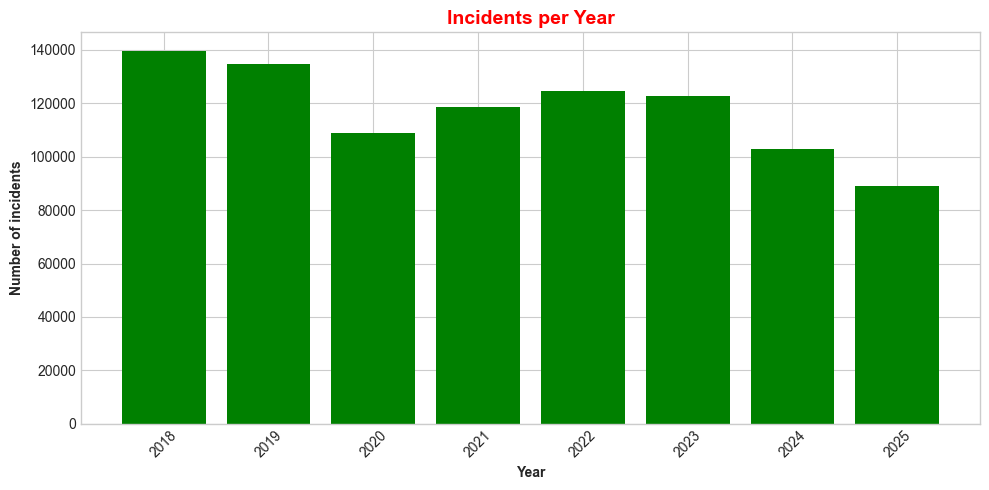

In [29]:
# counts per year
df['year'] = df['Incident Datetime'].dt.year
year_counts = df['year'].value_counts().sort_index()

print("Incidents per year:")
print(year_counts.to_string())
most_year = year_counts.idxmax()
least_year = year_counts.idxmin()
print(f"Year with most incidents: {most_year} ({year_counts[most_year]} incidents)")
print(f"Year with fewest incidents: {least_year} ({year_counts[least_year]} incidents)")

# bar chart
plt.figure(figsize=(10,5))
plt.bar(year_counts.index.astype(str), year_counts.values, color='green')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of incidents', fontweight='bold')
plt.title('Incidents per Year', fontweight='bold', color='red', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Focus Crimes

Looking at all crimes together can obscure important patterns. Different types of crime may have very different trends.

Let's focus on a subset of 16 crimes — I've chosen these as examples of serious & common crimes:

In [30]:
focus_crimes = [
  'Larceny Theft',
  'Assault',
  'Burglary',         
  'Motor Vehicle Theft',
  'Fraud',
  'Drug Offense',  
  'Missing Person',
  'Robbery',
  'Disorderly Conduct',
  'Weapons Offense',
  'Stolen Property',  
  'Arson',   
  'Traffic Collision',
  'Vandalism',
  'Sex Offense',
  'Prostitution',  
]

These crimes are worth examining individually because:
- They're serious enough to warrant police attention
- They are different enought to have different patterns and drivers
- Some (like drug offenses) are particularly susceptible to enforcement bias—more police presence leads to more arrests, which looks like more crime, which justifies more police presence...

> **Exercise 4.2**: Focus crime trends
>
> * Create a grid of subplots (e.g., 4x4) showing the year-by-year trend for each focus crime
> * Each subplot should show years on the x-axis and incident count on the y-axis
> * Make sure each subplot is labeled so viewers know what they're looking at
>
> **Visualization tips:**
> * When you have multiple subplots, you don't need to label every axis—shared labels on the edges are fine
> * Use `plt.tight_layout()` to prevent overlapping
> * Consider using consistent y-axis scales to enable comparison, OR let each scale independently to see patterns within each crime type (there are arguments for both approaches)

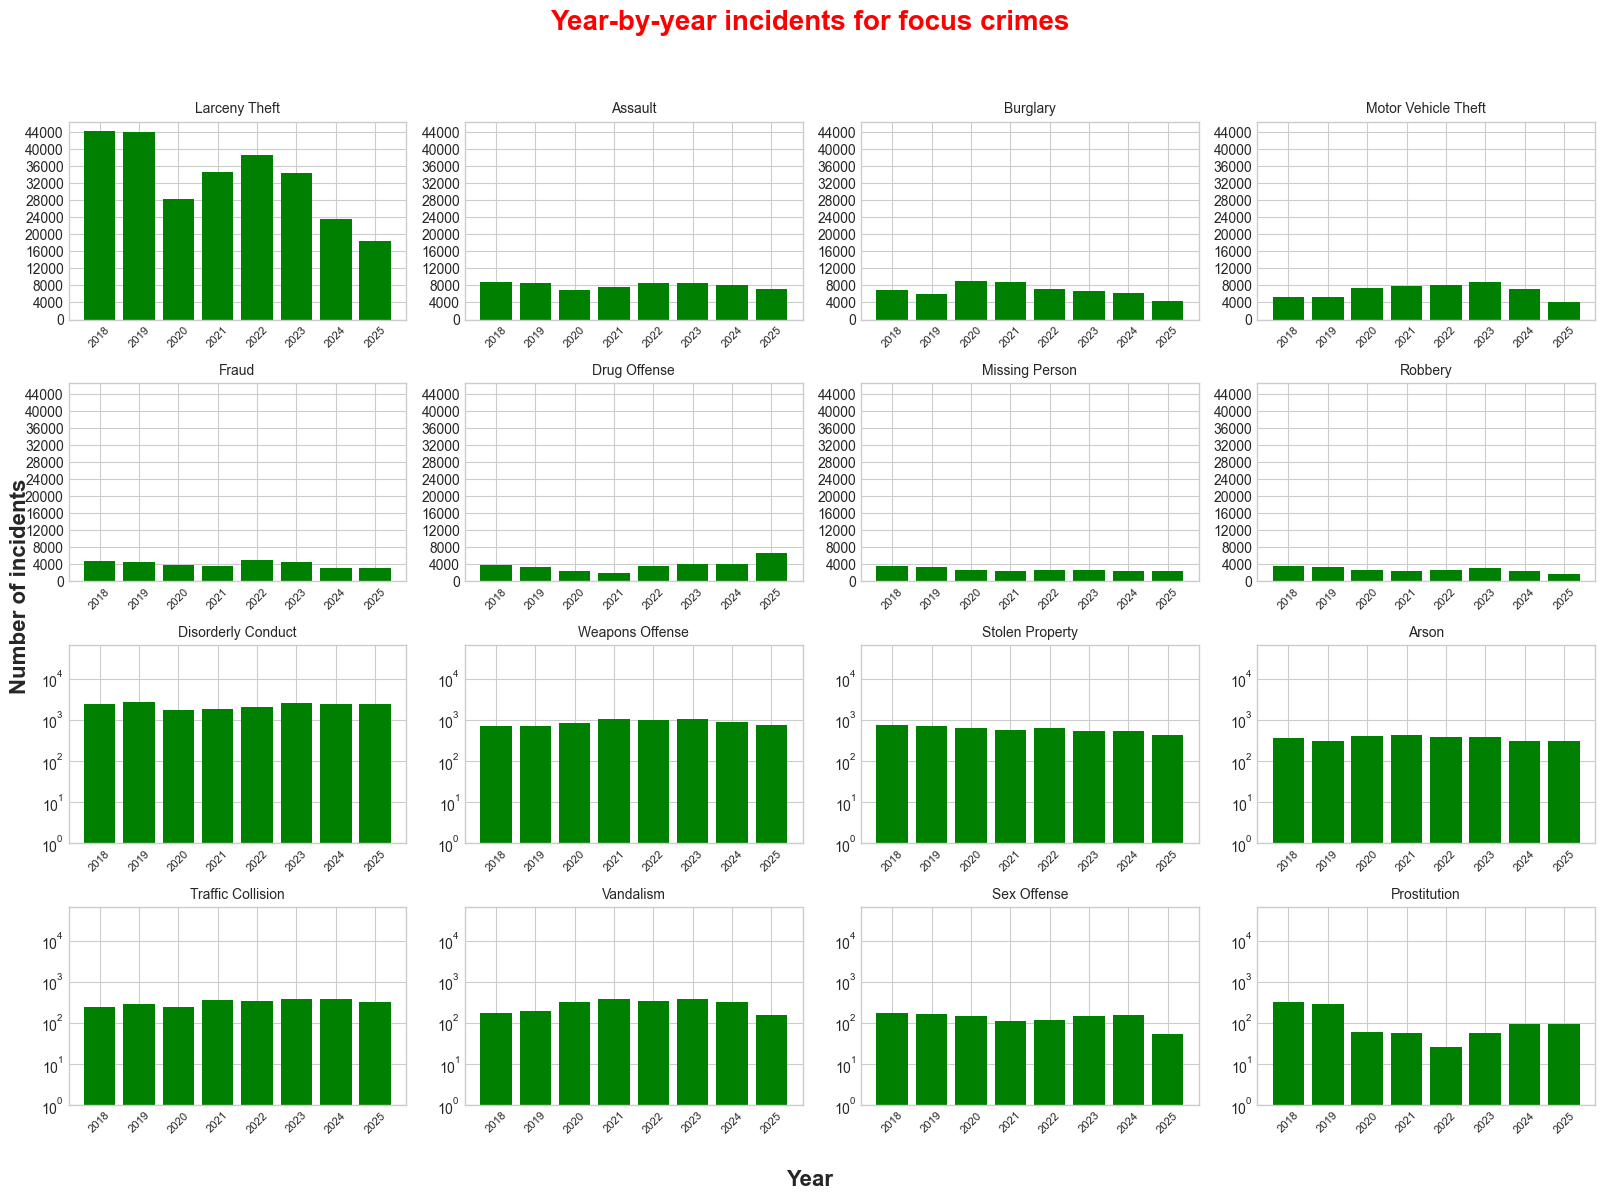

In [59]:
years = np.arange(df['year'].min(), df['year'].max() + 1)

# choose whether to use a shared y-axis scale across all subplots
consistent_y = True

# prepare counts for each focus crime
counts_by_crime = {}
max_count = 0
for crime in focus_crimes:
    s = df.loc[df['Incident Category'] == crime].groupby('year').size()
    s = s.reindex(years, fill_value=0)
    counts_by_crime[crime] = s
    max_count = max(max_count, int(s.max()))

# create 4x4 grid
n = len(focus_crimes)
cols = 4
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), squeeze=False)
fig.suptitle('Year-by-year incidents for focus crimes', fontsize=20, fontweight='bold', color='red')

for i, crime in enumerate(focus_crimes):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    s = counts_by_crime[crime]
    x_labels = years.astype(str)
    ax.bar(range(len(x_labels)), s.values, color='green')
    ax.set_title(crime, fontsize=10)
    
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, fontsize=8)

    # Use log scale for the last two rows
    if r >= 2:
        ax.set_yscale('log')
        # Adjust y-limits for log scale, avoiding zero
        lower_bound = 1
        if not consistent_y:
            upper_bound = s.max() * 1.5 if s.max() > 0 else 10
        else:
            upper_bound = max_count * 1.5 if max_count > 0 else 10

        ax.set_ylim(bottom=lower_bound, top=upper_bound)
    else:
        ax.set_yticks(np.arange(0, max_count + 1, 4000))
        if not consistent_y:
            ax.set_ylim(0, s.max() * 1.05 if s.max() > 0 else 1)
        else:
            ax.set_ylim(0, max_count * 1.05 if max_count > 0 else 1)

# hide any empty subplots
for j in range(n, rows * cols):
    r = j // cols
    c = j % cols
    axes[r][c].axis('off')

# shared axis labels
fig.text(0.5, 0, 'Year', ha='center', fontweight='bold', fontsize=16)
fig.text(0, 0.5, 'Number of incidents', va='center', rotation='vertical', fontweight='bold', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> **Exercise 4.3**: Interpret your findings
>
> Look at the focus crime plots and comment on at least **three interesting patterns** you observe. Consider:
> * Do all crimes follow the same trend, or do different crimes behave differently? 
>   * They do not all follow the same trend but there are similarities in many types of crimes, many of them present a drop during the years of the pandemic (2020-2021) and in these we can identify 3 main categories. The first group has a increase in 2022 that keeps increasing in the following year, the second group remains stable with the 2022 values, and the third group of crimes has an increase in 2022 (respect to the pandemic years), but then it starts decreasing again.
> * Are there any sudden changes? What might explain them?
>   * There are two types of sudden changes, decrease in the theft category (larceny, burglary, motor vehicle theft, robbery), sex offense, and vandalism in 2025 and an increase in drug offense in 2025.  
> * How might the COVID-19 pandemic (2020-2021) have affected different crime types? 
>   * The location and amount of crimes during the pandemic changed and generally decreased. Less crimes are committed outside, since the curfew and restrictions were taking place and people were forced to have limited interaction leading to fewer arguments that could lead to crimes.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The interpretation should be your own thinking. This is where you practice data analysis reasoning.
</div>

---

## You've Completed Week 1!

You've loaded real-world data, created visualizations, identified patterns, and thought critically about the implications of using data in high-stakes contexts.

If you want to go further:
* Take a look at the data from before 2018
* If you want to go nuts, you can merge the two datasets. It's not easy because the crime-types are not consistent over time, but perhaps you can ask an LLM to help you identify which ones can be matched up.
* Experiment with your visualizations—try different color schemes, annotations, or plot types
* Look at other temporal patterns: Are there differences by day of week? Time of day?
* Explore the spatial data: Which police districts have the most crime? (We'll dig into this more in coming weeks)